# Initialization


In [1]:
# Installing cassandra drivers
!pip install cassandra-driver

In [2]:
#Confirming version
import cassandra
print (cassandra.__version__)

3.25.0


In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings 
warnings.filterwarnings(action='ignore')

In [4]:
# Connecting to cassandra DB
client_id = 'AsRlDWZTUgamzlbxUeZqPPOc'
client_secret = '-jZZYxLDSUFdYQ-h_G_Bu4huiKTz465bwp+lNoLI,N0F82Lrwt0KLqDbbBQ9EMQYs_.9ZYPpqGBQM5a+b8z3vaQUGqkLxIhhYQbQ.ljqtJJSa5LbuHw7tSLe9-SZobrS'
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {'secure_connect_bundle': 'secure-connect-adult-census.zip'}
auth_provider = PlainTextAuthProvider(client_id, client_secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
      print(row[0])
else:
      print("An error occurred.")

4.0.0.6816


In [5]:
#Creating a pandas dataframe
df = pd.DataFrame(list(session.execute("select * from kuldeep.adult_data;")))

# getting different columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [6]:
# Visualising data
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,60,Private,193235,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,24,United-States,<=50K
1,19,Private,349620,10th,6,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K
2,47,Private,185399,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,38,United-States,<=50K
3,41,Local-gov,180096,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,<=50K
4,39,Local-gov,189911,11th,7,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
5,40,Private,147206,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
6,20,Private,494784,HS-grad,9,Never-married,Sales,Other-relative,Black,Female,0,0,35,United-States,<=50K
7,17,Private,230789,9th,5,Never-married,Sales,Own-child,Black,Male,0,0,22,United-States,<=50K
8,32,Private,425622,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,55,United-States,<=50K
9,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [7]:
# Checking Data type of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  country         32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#Checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

# Column wise data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

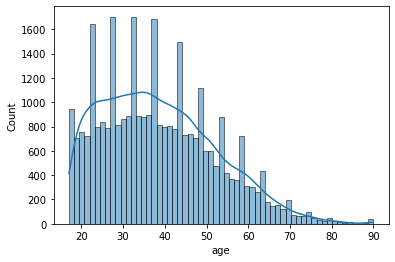

In [9]:
# Analyzing age column

# Age distribution
sns.histplot(data=df.age,kde=True)

Data in age column is right skewed 

skewness of age column =  0.5576631514973127


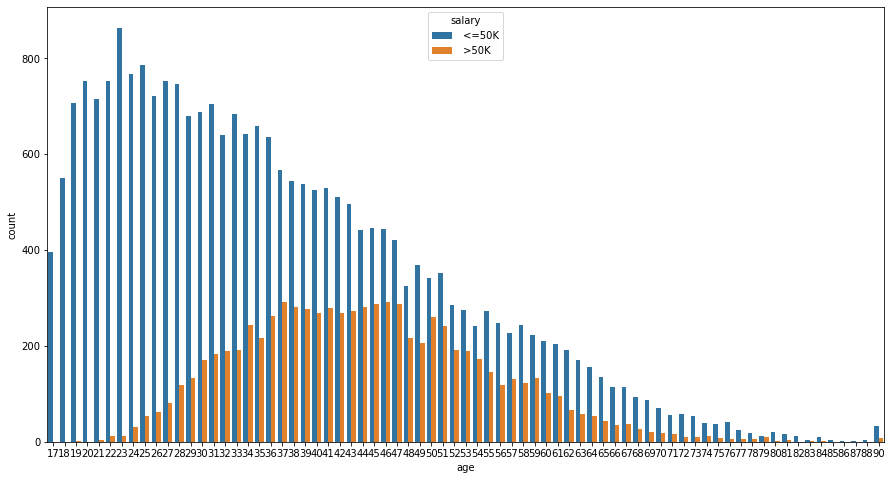

In [10]:
# Salary dependency on age
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='age',hue='salary')
print('skewness of age column = ',df.age.skew())

People below the age of 20 are rare to have salary >50k, the number gradually increases with age. less data is available for ages above 40, skewness  of age column needs to be reduced.

skewness= -0.13226566744674909


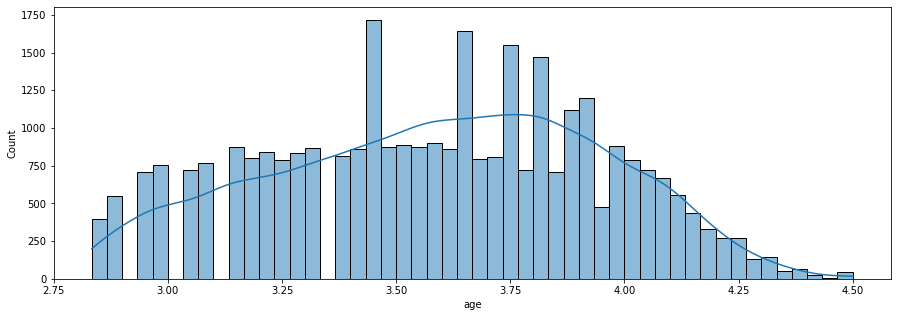

In [11]:
# Taking log of age column to get rid of skewness
df.age=np.log(df.age)
# checking skewness
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='age',kde=True)
print('skewness=',df.age.skew())

Skewness is significently reduces after taking log

In [12]:
# Checking unique values in age column

df.age.unique()

array([4.09434456, 2.94443898, 3.8501476 , 3.71357207, 3.66356165,
       3.68887945, 2.99573227, 2.83321334, 3.4657359 , 3.76120012,
       3.58351894, 3.25809654, 3.97029191, 3.09104245, 3.95124372,
       3.55534806, 3.80666249, 3.36729583, 4.00733319, 3.17805383,
       4.07753744, 4.11087386, 3.8286414 , 3.78418963, 3.63758616,
       3.91202301, 3.87120101, 3.29583687, 2.89037176, 3.61091791,
       3.73766962, 4.14313473, 3.49650756, 3.04452244, 4.06044301,
       3.52636052, 3.33220451, 4.12713439, 3.13549422, 3.93182563,
       4.15888308, 3.40119738, 3.8918203 , 4.26267988, 4.2341065 ,
       3.4339872 , 4.27666612, 4.04305127, 3.21887582, 3.98898405,
       4.17438727, 4.18965474, 4.20469262, 4.34380542, 4.35670883,
       4.02535169, 4.24849524, 4.4308168 , 4.49980967, 4.21950771,
       4.33073334, 4.40671925, 4.29045944, 4.30406509, 4.36944785,
       4.31748811, 4.46590812, 4.38202663, 4.39444915, 4.47733681,
       4.41884061, 4.44265126, 4.4543473 ])

In [13]:
# Analyzing workclass column

#Checking unique values
df.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-inc', ' State-gov',
       ' Self-emp-not-inc', ' ?', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

An unknown value '?' is there which needs to be catgorized.

<AxesSubplot:xlabel='workclass', ylabel='Count'>

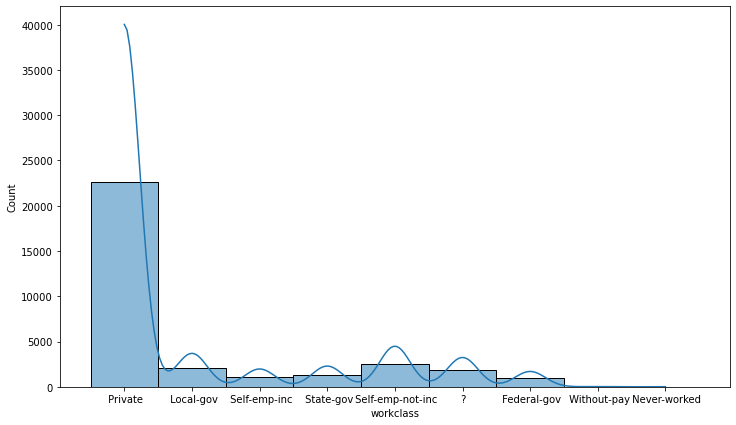

In [14]:
# Workclass and count of people

plt.figure(figsize=(12,7))
sns.histplot(data=df.workclass,kde=True)

In [15]:
# getting number of '?'s
(df.workclass==' ?').sum()

1836

Total 1836 '?'s

In [16]:
# Checking how many '?'s have salary >50K

(df.salary[df.workclass==' ?']==' >50K').sum()

191

191 people with unknown workclass (?) have salary >50K

In [17]:
# Renaming ' ?' to ' Other' category
df.replace(to_replace=[' ?'],value=[' Other'],inplace=True)
df.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-inc', ' State-gov',
       ' Self-emp-not-inc', ' Other', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
# Checking if people in category 'Never-worked' and 'Without pay' have salary >50K

print('People who never work and have salary >50k =',(df.salary[df.workclass==' Never-worked']==' >50K').sum())
print('People who are without pay and have salary >50k =',(df.salary[df.workclass==' Without-pay']==' >50K').sum())

People who never work and have salary >50k = 0
People who are without pay and have salary >50k = 0


These two categories can be renamed to category unemployed

In [19]:
df.replace(to_replace=[' Never-worked',' Without-pay'],value=[' Unemployed',' Unemployed'],inplace=True)

# checking unique workclass categories
df.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-inc', ' State-gov',
       ' Self-emp-not-inc', ' Other', ' Federal-gov', ' Unemployed'],
      dtype=object)

<AxesSubplot:xlabel='workclass', ylabel='Count'>

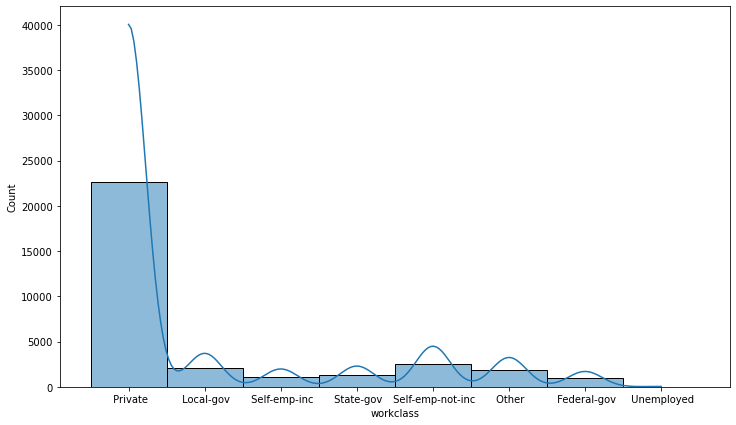

In [20]:
# Workclass and count of people after category change

plt.figure(figsize=(12,7))
sns.histplot(data=df.workclass,kde=True)

<AxesSubplot:xlabel='workclass', ylabel='count'>

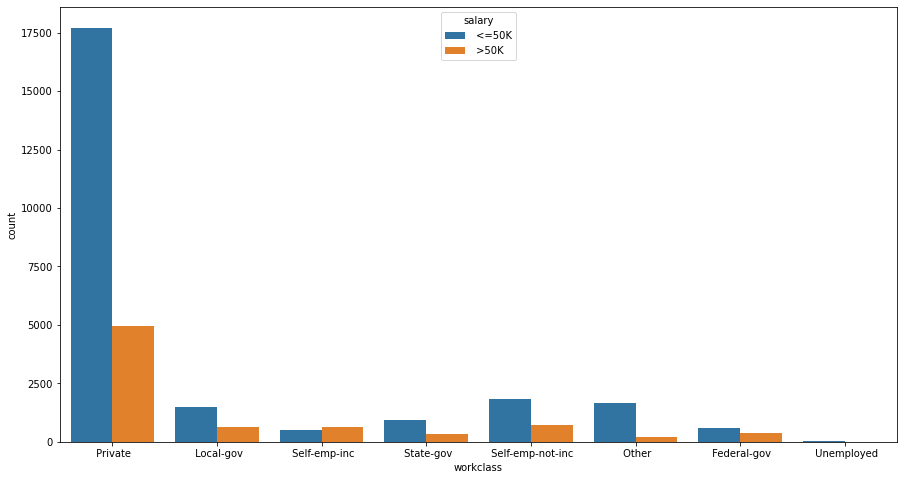

In [21]:
# Salary dependency on workclass
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='workclass',hue='salary')

People in workclass self-emp-inc are more likely to have a salary >50k. people in government sectors also have high probability of having salary >50k. 

In [22]:
# analyzing education and education_num column
# education-num is education rank. putting it in ascending order
df.groupby(by='education').describe()['education_num']['mean'].sort_values()

education
 Preschool        1.0
 1st-4th          2.0
 5th-6th          3.0
 7th-8th          4.0
 9th              5.0
 10th             6.0
 11th             7.0
 12th             8.0
 HS-grad          9.0
 Some-college    10.0
 Assoc-voc       11.0
 Assoc-acdm      12.0
 Bachelors       13.0
 Masters         14.0
 Prof-school     15.0
 Doctorate       16.0
Name: mean, dtype: float64

Education column can be dropped and no need to encode education_num column as it shows the rank and hiararchy is education.

In [23]:
# Dropping education column
df.drop('education',axis=1,inplace=True)

In [24]:
# Getting percentage of people by education
df.education_num.value_counts(normalize=True,ascending=True)*100

1      0.153671
2      0.510188
3      1.020377
16     1.269324
8      1.330793
5      1.579740
15     1.770292
4      1.982359
6      2.867505
12     3.279344
7      3.611273
11     4.247472
14     5.292436
13    16.452039
10    22.380674
9     32.252513
Name: education_num, dtype: float64

<AxesSubplot:xlabel='education_num', ylabel='count'>

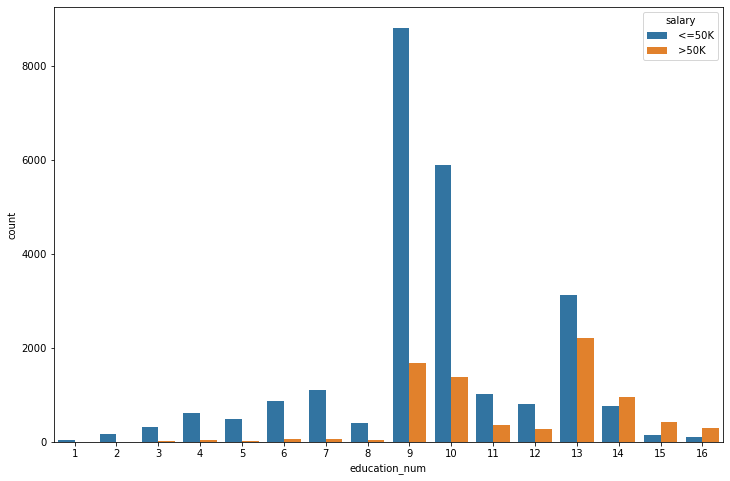

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='education_num',hue='salary')

Unique values in gender column = [' Male' ' Female']
Gender wise count :
  Male      21775
 Female    10762
Name: sex, dtype: int64
Gender wise salary comparision


<AxesSubplot:xlabel='sex', ylabel='count'>

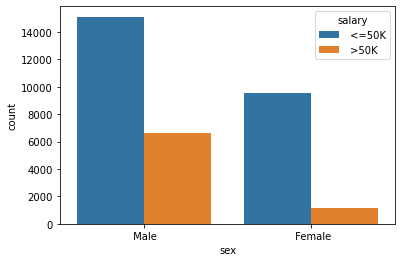

In [26]:
# Gender wise analysis
print('Unique values in gender column =',df.sex.unique())
print('Gender wise count :\n',df.sex.value_counts())
print('Gender wise salary comparision')
sns.countplot(data=df,x='sex',hue='salary')

male population is getting more >50k salary.

In [27]:
# Encoding sex column, male as 0 and female as 1
df.replace(to_replace=[' Male',' Female'],value=[0,1],inplace=True)
# cheching uniques after encoding
df.sex.unique()

array([0, 1], dtype=int64)

In [28]:
# Analyzing race column
# Getting uniques
df.race.unique()

array([' White', ' Black', ' Other', ' Asian-Pac-Islander',
       ' Amer-Indian-Eskimo'], dtype=object)

In [29]:
# getting race wise count
df.race.value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

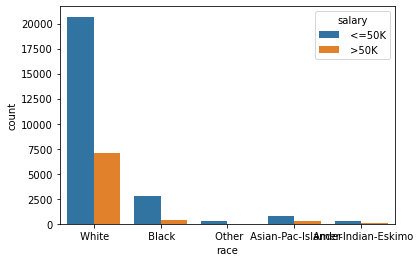

In [30]:
# race-salary visualization
sns.countplot(data=df,x='race',hue='salary')

White people are more likely to have >50k salary than other races. 

Unique values in marital_status column = [' Married-civ-spouse' ' Never-married' ' Divorced' ' Separated'
 ' Widowed' ' Married-spouse-absent' ' Married-AF-spouse']
marital_status wise count :
  Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
marital_status wise salary comparision
Unique values in relationship column = [' Husband' ' Own-child' ' Wife' ' Unmarried' ' Other-relative'
 ' Not-in-family']
relationship wise count :
  Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64
relationship wise salary comparision


<AxesSubplot:xlabel='relationship', ylabel='count'>

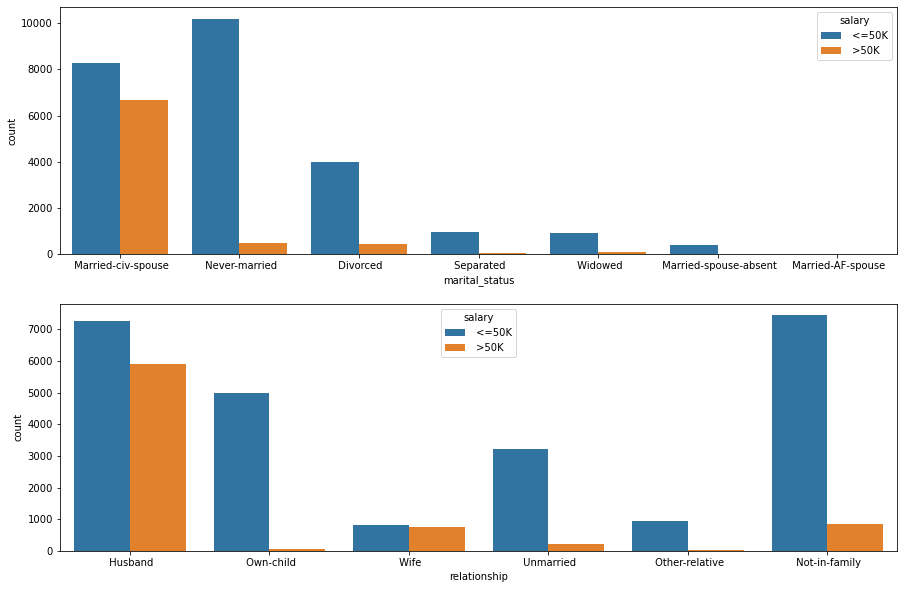

In [31]:
# Analyzing marital status and relationship columns
print('Unique values in marital_status column =',df.marital_status.unique())
print('marital_status wise count :\n',df.marital_status.value_counts())
print('marital_status wise salary comparision')
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.countplot(data=df,x='marital_status',hue='salary')
print('Unique values in relationship column =',df.relationship.unique())
print('relationship wise count :\n',df.relationship.value_counts())
print('relationship wise salary comparision')
plt.subplot(212)
sns.countplot(data=df,x='relationship',hue='salary')

Merital status column and relationship column have similar data as showm in above bar charts. Married people have higher chance of having salary >50k while unmarried people have a lower chance, similarily people who are husband or wife have a higher chance of having salary >50k compared to other people. The relationship column can be dropped and merital status column can be encoded into 0 and 1 where 1 states married and 0 states everythis else.

In [32]:
# Dropping relationship column
df.drop('relationship',axis=1,inplace=True)

In [33]:
# Encoding marital status column
df.replace(to_replace=[' Married-civ-spouse',' Never-married',' Divorced',' Separated',' Widowed',' Married-spouse-absent',' Married-AF-spouse'],value=([1,0,0,0,0,0,0]),inplace=True)
# Checking uniques after encoding
df.marital_status.unique()

array([1, 0], dtype=int64)

In [34]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'country', 'salary'],
      dtype='object')

Unique values in occupation column = [' Adm-clerical' ' Machine-op-inspct' ' Other-service' ' Prof-specialty'
 ' Craft-repair' ' Sales' ' Transport-moving' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Other' ' Priv-house-serv'
 ' Tech-support' ' Protective-serv' ' Armed-Forces']
occupation wise count :
  Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Other                1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64
occupation wise salary comparision


<AxesSubplot:xlabel='occupation', ylabel='count'>

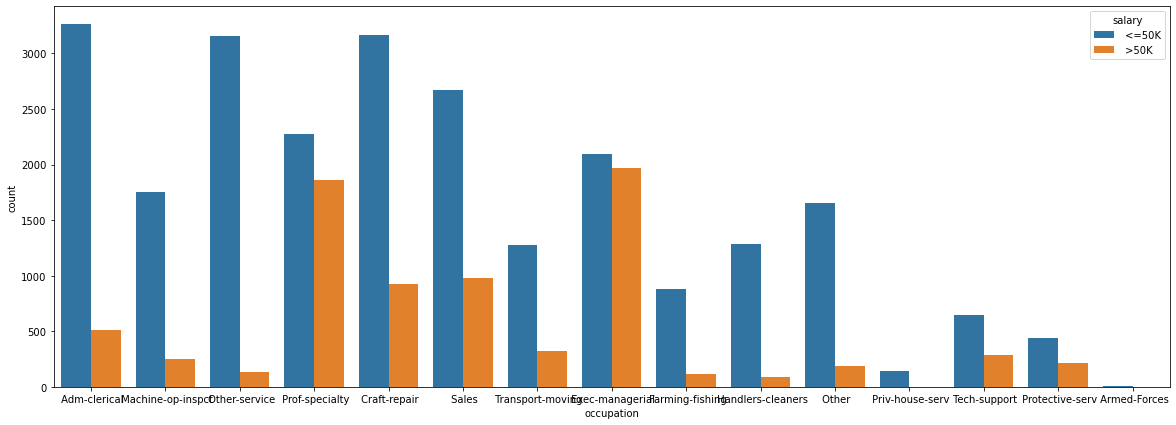

In [35]:
# Analyzing occupation column
print('Unique values in occupation column =',df.occupation.unique())
print('occupation wise count :\n',df.occupation.value_counts())
print('occupation wise salary comparision')
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='occupation',hue='salary')

In [36]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'country', 'salary'],
      dtype='object')

In [37]:
# Analyzing capital gain, capital loss columns
#checking unique values
df.capital_gain.sort_values().unique()

array([    0,   114,   401,   594,   914,   991,  1055,  1086,  1111,
        1151,  1173,  1409,  1424,  1455,  1471,  1506,  1639,  1797,
        1831,  1848,  2009,  2036,  2050,  2062,  2105,  2174,  2176,
        2202,  2228,  2290,  2329,  2346,  2354,  2387,  2407,  2414,
        2463,  2538,  2580,  2597,  2635,  2653,  2829,  2885,  2907,
        2936,  2961,  2964,  2977,  2993,  3103,  3137,  3273,  3325,
        3411,  3418,  3432,  3456,  3464,  3471,  3674,  3781,  3818,
        3887,  3908,  3942,  4064,  4101,  4386,  4416,  4508,  4650,
        4687,  4787,  4865,  4931,  4934,  5013,  5060,  5178,  5455,
        5556,  5721,  6097,  6360,  6418,  6497,  6514,  6723,  6767,
        6849,  7298,  7430,  7443,  7688,  7896,  7978,  8614,  9386,
        9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020,
       15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095,
       41310, 99999], dtype=int64)

In [38]:
#checking salary of people who made any capital gain
df.salary[df.capital_gain>0].value_counts()

 >50K     1677
 <=50K    1035
Name: salary, dtype: int64

<AxesSubplot:>

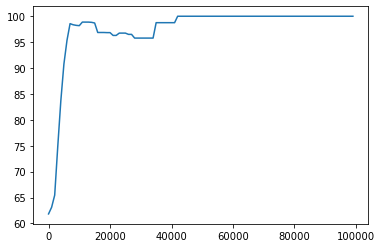

In [39]:
# Plotting %age of people earning >50k as capital gain increases
l1=[]
l2=[]
a=0
while a<(df.capital_gain.max()):
    l1.append(((pd.DataFrame(df.salary[df.capital_gain>a].value_counts()).salary[0])/(df.capital_gain>a).sum())*100)
    l2.append(a)
    a=a+1000
sns.lineplot(x=l2,y=l1)

In [40]:
df.capital_loss.sort_values().unique()

array([   0,  155,  213,  323,  419,  625,  653,  810,  880,  974, 1092,
       1138, 1258, 1340, 1380, 1408, 1411, 1485, 1504, 1539, 1564, 1573,
       1579, 1590, 1594, 1602, 1617, 1628, 1648, 1651, 1668, 1669, 1672,
       1719, 1721, 1726, 1735, 1740, 1741, 1755, 1762, 1816, 1825, 1844,
       1848, 1876, 1887, 1902, 1944, 1974, 1977, 1980, 2001, 2002, 2042,
       2051, 2057, 2080, 2129, 2149, 2163, 2174, 2179, 2201, 2205, 2206,
       2231, 2238, 2246, 2258, 2267, 2282, 2339, 2352, 2377, 2392, 2415,
       2444, 2457, 2467, 2472, 2489, 2547, 2559, 2603, 2754, 2824, 3004,
       3683, 3770, 3900, 4356], dtype=int64)

In [41]:
#checking salary of people who made any capital loss
df.salary[df.capital_loss>0].value_counts()

 >50K     773
 <=50K    746
Name: salary, dtype: int64

<AxesSubplot:>

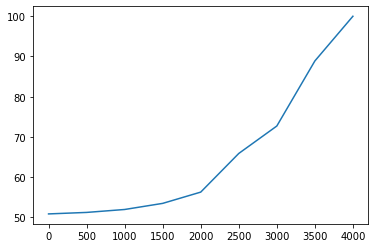

In [42]:
# Plotting %age of people earning >50k as capital loss increases
l1=[]
l2=[]
a=0
while a<(df.capital_loss.max()):
    l1.append(((pd.DataFrame(df.salary[df.capital_loss>a].value_counts()).salary[0])/(df.capital_loss>a).sum())*100)
    l2.append(a)
    a=a+500
sns.lineplot(x=l2,y=l1)

It is clear from above illustrations, capital gain and capital loss shows strong correlation with salary of a person as it shows a persons abality to invest. Thes two columns are importand but we can combine them and show capital gain as +va and loss as -ve

In [43]:
# Combining capital gain and capital loss column
df.capital_gain=df.capital_gain-df.capital_loss

In [44]:
#dropping capital loss column
df.drop('capital_loss',axis=1,inplace=True)
# checking unique vaules in capital gain column
print(df.capital_gain.unique())
# renaming capital gain column as capital_gain/loss cloumn
df.rename(columns={'capital_gain':'capital_gain/loss'},inplace=True)
# checking cloumn names to confirm
df.columns

[    0 99999 -1980  2829 -1974 -2415  4650 -1977 15024  4064  7688  2964
 -1902  7298  1797  5455 -2001 -1740 25236  8614  5178  9386 -1590 -1579
 -2824  4386  1055 27828  3781 -1876 14344 -1672 20051  2885  3325  4101
  3103 -1741 -1762 -1651  2290 -1887 -2377  -213 -2754  2354  6849 -3683
 -2051  7443 10605 -2129  4787  6497  3942 -1602 -2559  3137   594  2174
  -625 -2444 -1408 -1564 -1719 -1258  4934 -1848 -2339 -1668 -1721  3471
  2597 -1340 10520  3908  2105  4508  3674 10566  3432 15831 -1669 -2002
 -2174  1506  3887  7430 -1485  2176  5013 -2179  4865  5721  1151  1409
 -2392   114  6723 -1816 13550  3411  2580 -1573  4416  2387 -1617 -2246
  7896  1111 -2258 -1092  3464  7978 -1628 14084 34095 -1755  2407  2036
 -2042  2202 -2547  -653  3418  2009  2635 -2057  2228 -1380  1173 -1825
  6360 -2238 -1504 -2603  1639 -1726 25124 -2206  2414 -2231 -2467  2936
 -3900 -1138  -880  3818  2463 -4356  2346  2977  2329  2050  5556 -1648
 15020 -1594  -323 -2149  9562 -2205 -1735  1848  2

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'race', 'sex', 'capital_gain/loss', 'hours_per_week',
       'country', 'salary'],
      dtype='object')

In [45]:
# Analyzing country column
df.country.value_counts(normalize=True)*100

 United-States                 89.599533
 Mexico                         1.963918
 Other                          1.788733
 Philippines                    0.608538
 Germany                        0.421059
 Canada                         0.371884
 Puerto-Rico                    0.350370
 El-Salvador                    0.325783
 India                          0.307342
 Cuba                           0.291975
 England                        0.276608
 Jamaica                        0.248947
 South                          0.245874
 China                          0.230507
 Italy                          0.224360
 Dominican-Republic             0.215140
 Vietnam                        0.205919
 Japan                          0.190552
 Guatemala                      0.190552
 Poland                         0.184405
 Columbia                       0.181332
 Taiwan                         0.156745
 Haiti                          0.135231
 Iran                           0.132157
 Portugal       

Almost 90% people are from US. This column should be deleted as it will only create bias in data

In [46]:
df.drop(columns=('country'),axis=1,inplace=True)

In [47]:
# Analyzing work hours per week column
df.hours_per_week.value_counts(normalize=True)*100

40    46.728340
50     8.657836
45     5.602852
60     4.533301
35     3.983158
        ...    
92     0.003073
82     0.003073
74     0.003073
87     0.003073
94     0.003073
Name: hours_per_week, Length: 94, dtype: float64

<AxesSubplot:xlabel='hours_per_week', ylabel='count'>

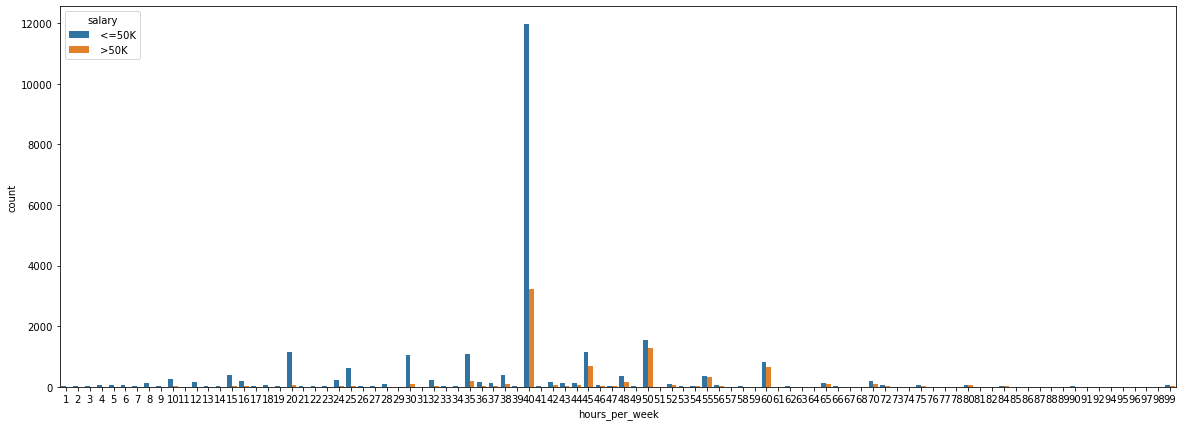

In [48]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='hours_per_week',hue='salary')

In [49]:
print('salary data for people working less than 10 hours a week \n',df.salary[df.hours_per_week<10].value_counts())

salary data for people working less than 10 hours a week 
  <=50K    413
 >50K      45
Name: salary, dtype: int64


In [50]:
print('salary data for people working less than 5 hours a week \n',df.salary[df.hours_per_week<5].value_counts())

salary data for people working less than 5 hours a week 
  <=50K    131
 >50K      14
Name: salary, dtype: int64


We can see that people in all work hour categories have salary >50k, this column seem to be irrelevent and this will add bais to data as maximum people work 40 hours a week and that's why this coulmn should be dropped.

In [51]:
# Dropping hours per week column
df.drop(columns='hours_per_week',axis=1,inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'race', 'sex', 'capital_gain/loss', 'salary'],
      dtype='object')

In [52]:
# Analyzing race column
df.race.value_counts(normalize=True)*100

 White                 85.425823
 Black                  9.595230
 Asian-Pac-Islander     3.190214
 Amer-Indian-Eskimo     0.955835
 Other                  0.832898
Name: race, dtype: float64

<AxesSubplot:xlabel='race', ylabel='count'>

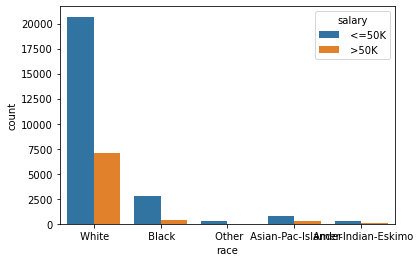

In [53]:
sns.countplot(data=df,x='race',hue='salary')

In [54]:
# Analyzing salary column
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

We have to categories in salary column, we need to encode it to 0 and 1, salary >50 will be encoded as 1

In [55]:
# Encoding salary column
df.replace(to_replace=[' <=50K', ' >50K'],value=[0,1],inplace=True)
df.salary.unique()

array([0, 1], dtype=int64)

In [56]:
# Dropping non useful columns
df.drop(columns=['fnlwgt'],axis=1,inplace=True)
df.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'race', 'sex', 'capital_gain/loss', 'salary'],
      dtype='object')

In [57]:
#checking column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                32537 non-null  float64
 1   workclass          32537 non-null  object 
 2   education_num      32537 non-null  int64  
 3   marital_status     32537 non-null  int64  
 4   occupation         32537 non-null  object 
 5   race               32537 non-null  object 
 6   sex                32537 non-null  int64  
 7   capital_gain/loss  32537 non-null  int64  
 8   salary             32537 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.2+ MB


We have 3 non numerical columns. we are going to perform one hot encoding on these columns.

In [58]:
# Performing one hot encoding on workclass column
df=pd.get_dummies(df,columns=['workclass','occupation','race'])

In [59]:
#checking head of data after one hot encoding
df.shape

(32537, 34)

In [60]:
# separating target column from data and naming it as Y, naming features as X
Y=pd.DataFrame(df.salary)
df.drop(columns=['salary'],axis=1,inplace=True)
X=df

In [61]:
#checking shape of target and features
print('shape of X =',X.shape)
print('shape of Y =',Y.shape)

shape of X = (32537, 33)
shape of Y = (32537, 1)


# Model Building

In [62]:
# Installing Catboost 
!pip install catboost

In [63]:
# Improting various classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [64]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [65]:
# Importing various accuracy scales
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [66]:
# Comparing different classification models
from sklearn.pipeline import Pipeline
models = [LogisticRegression(), SVC(), AdaBoostClassifier(), RandomForestClassifier(), XGBClassifier(),
          DecisionTreeClassifier(), KNeighborsClassifier(), CatBoostClassifier()]

model_labels = ['LogisticReg.','SVC','AdaBoost','RandomForest','Xgboost','DecisionTree','KNN', 'CatBoost']
Train_accuracy=[]
Test_accuracy=[]
for model in models:
    model.fit(X_train,Y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    Accuracy_train=accuracy_score(Y_train,y_pred_train)
    Accuracy_test=accuracy_score(Y_test,y_pred_test)
    Train_accuracy.append(Accuracy_train)
    Test_accuracy.append(Accuracy_test)

Learning rate set to 0.041432
0:	learn: 0.6528035	total: 152ms	remaining: 2m 31s
1:	learn: 0.6156570	total: 160ms	remaining: 1m 19s
2:	learn: 0.5849370	total: 169ms	remaining: 56.1s
3:	learn: 0.5590307	total: 174ms	remaining: 43.4s
4:	learn: 0.5345946	total: 183ms	remaining: 36.4s
5:	learn: 0.5115173	total: 192ms	remaining: 31.8s
6:	learn: 0.4924979	total: 200ms	remaining: 28.4s
7:	learn: 0.4760905	total: 210ms	remaining: 26s
8:	learn: 0.4584927	total: 218ms	remaining: 24s
9:	learn: 0.4440318	total: 225ms	remaining: 22.3s
10:	learn: 0.4317063	total: 232ms	remaining: 20.9s
11:	learn: 0.4201720	total: 239ms	remaining: 19.7s
12:	learn: 0.4109360	total: 246ms	remaining: 18.6s
13:	learn: 0.4023318	total: 252ms	remaining: 17.8s
14:	learn: 0.3950841	total: 259ms	remaining: 17s
15:	learn: 0.3883757	total: 265ms	remaining: 16.3s
16:	learn: 0.3825047	total: 272ms	remaining: 15.7s
17:	learn: 0.3772617	total: 279ms	remaining: 15.2s
18:	learn: 0.3717743	total: 285ms	remaining: 14.7s
19:	learn: 0.36

Text(0, 0.5, 'Accuracy Score')

<Figure size 432x288 with 0 Axes>

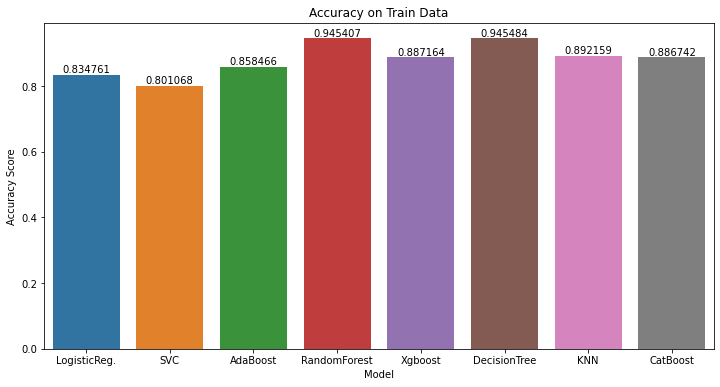

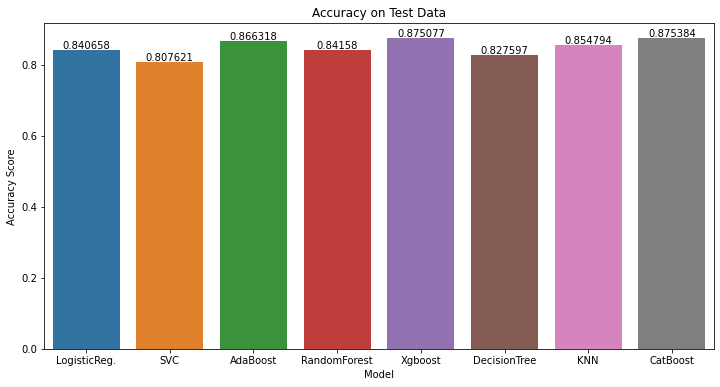

In [67]:
# Comparing accuracy of different models on Train data and test data
plt.figure(211)
plt.figure(figsize=(12,6))
ax1=sns.barplot(x=model_labels,y=Train_accuracy)
ax1.bar_label(ax1.containers[0])
plt.title('Accuracy on Train Data')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.figure(212)
plt.figure(figsize=(12,6))
ax2=sns.barplot(x=model_labels,y=Test_accuracy)
ax2.bar_label(ax2.containers[0])
plt.title('Accuracy on Test Data')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

Decision Tree and random forest both models have very high accuracy on train data but not so good accuracy on test data, CatBoost and XGBoost models have highest accuracy on test data, thats why we will consider these two models for further analysis.

In [68]:
XGB=XGBClassifier()
XGB.fit(X_train,Y_train)
XGpred=XGB.predict(X_test)
CAT=CatBoostClassifier()
CAT.fit(X_train,Y_train)
CATpred=CAT.predict(X_test)

Learning rate set to 0.041432
0:	learn: 0.6528035	total: 7.7ms	remaining: 7.69s
1:	learn: 0.6156570	total: 15.5ms	remaining: 7.74s
2:	learn: 0.5849370	total: 23ms	remaining: 7.65s
3:	learn: 0.5590307	total: 29.7ms	remaining: 7.39s
4:	learn: 0.5345946	total: 39.6ms	remaining: 7.88s
5:	learn: 0.5115173	total: 47.6ms	remaining: 7.89s
6:	learn: 0.4924979	total: 55.7ms	remaining: 7.9s
7:	learn: 0.4760905	total: 63.3ms	remaining: 7.84s
8:	learn: 0.4584927	total: 71.1ms	remaining: 7.83s
9:	learn: 0.4440318	total: 79.2ms	remaining: 7.84s
10:	learn: 0.4317063	total: 87ms	remaining: 7.82s
11:	learn: 0.4201720	total: 94.9ms	remaining: 7.82s
12:	learn: 0.4109360	total: 102ms	remaining: 7.78s
13:	learn: 0.4023318	total: 110ms	remaining: 7.76s
14:	learn: 0.3950841	total: 118ms	remaining: 7.74s
15:	learn: 0.3883757	total: 125ms	remaining: 7.71s
16:	learn: 0.3825047	total: 133ms	remaining: 7.72s
17:	learn: 0.3772617	total: 141ms	remaining: 7.71s
18:	learn: 0.3717743	total: 149ms	remaining: 7.68s
19:	l

In [69]:
# Comparing various scores of the two models
print('F1 score for XGBoost model :\n',f1_score(Y_test,XGpred))
print('Precision score for XGBoost model :\n',precision_score(Y_test,XGpred))
print('Recall score for XGBoost model :\n',recall_score(Y_test,XGpred))
print('Accuracy score for XGBoost model :\n',accuracy_score(Y_test,XGpred))
print('\n\n')
print('F1 score for Catboost model :\n',f1_score(Y_test,CATpred))
print('Precision score for Catboost model :\n',precision_score(Y_test,CATpred))
print('Recall score for Catboost model :\n',recall_score(Y_test,CATpred))
print('Accuracy score for Catboost model :\n',accuracy_score(Y_test,CATpred))

F1 score for XGBoost model :
 0.7134296792386323
Precision score for XGBoost model :
 0.7719298245614035
Recall score for XGBoost model :
 0.6631716906946264
Accuracy score for XGBoost model :
 0.8750768285187461



F1 score for Catboost model :
 0.713528788413988
Precision score for Catboost model :
 0.7739463601532567
Recall score for Catboost model :
 0.6618610747051114
Accuracy score for Catboost model :
 0.8753841425937308


Both models have almost similar accuracy in all aspects but XGBoost model has slightly better recall score and recall score is most important as a finencial institution me must not let any customer left out becouse of false prediction hance number of false negatives should be minimum. For this reason, we will consider Catboost Model for hyper-parameter tuning to improve accuracy. 

### Hyper parameter tuning

In [70]:
 from sklearn.model_selection import GridSearchCV
params = {
    'depth':[2,3,4,5],
    'learning_rate':[0.015,0.01,0.02,0.025],
    'iterations':[6,7,8,9]
}

In [71]:
grid_search=GridSearchCV(estimator=CatBoostClassifier(class_weights={0:1, 1:3}),param_grid=params,n_jobs=(-1),scoring='recall')

In [72]:
grid_search.fit(X,Y)

0:	learn: 0.6867737	total: 7.32ms	remaining: 51.2ms
1:	learn: 0.6801778	total: 13.6ms	remaining: 40.8ms
2:	learn: 0.6742932	total: 20.8ms	remaining: 34.7ms
3:	learn: 0.6679650	total: 28.4ms	remaining: 28.4ms
4:	learn: 0.6618177	total: 37.3ms	remaining: 22.4ms
5:	learn: 0.6563477	total: 50.1ms	remaining: 16.7ms
6:	learn: 0.6506449	total: 62.1ms	remaining: 8.87ms
7:	learn: 0.6454661	total: 72.9ms	remaining: 0us


GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x000001F48049B5B0>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 4, 5], 'iterations': [6, 7, 8, 9],
                         'learning_rate': [0.015, 0.01, 0.02, 0.025]},
             scoring='recall')

In [73]:
grid_search.best_score_

0.8946296706302176

In [74]:
grid_search.best_params_

{'depth': 3, 'iterations': 8, 'learning_rate': 0.01}

We have succesfully improved the recall score of CatBoost Model from 66.18% to 89.46%, which is a significant boost. We will use CatBoost model with the best parameters from Grid Search for deployment.

In [75]:
CatModel=CatBoostClassifier(class_weights={0:1, 1:3},depth=3,iterations=8,learning_rate=0.01)
CatModel.fit(X,Y)
preds=CatModel.predict(X_test)
print('Model Score =',recall_score(Y_test,preds)*100,'%')

0:	learn: 0.6867737	total: 5.3ms	remaining: 37.1ms
1:	learn: 0.6801778	total: 10.2ms	remaining: 30.7ms
2:	learn: 0.6742932	total: 15.2ms	remaining: 25.3ms
3:	learn: 0.6679650	total: 20ms	remaining: 20ms
4:	learn: 0.6618177	total: 24.7ms	remaining: 14.8ms
5:	learn: 0.6563477	total: 30ms	remaining: 10ms
6:	learn: 0.6506449	total: 34.8ms	remaining: 4.97ms
7:	learn: 0.6454661	total: 39.8ms	remaining: 0us
Model Score = 90.69462647444298 %


We are gettig a score of 90.69% for test data.

### Exporting trained model to local storage

In [76]:
import pickle

In [77]:
pickle.dump(CatModel,open('model.pkl', 'wb'))

In [78]:
#Checking if pickled model is predicting correctly or not
pickled_model=pickle.load(open('model.pkl','rb'))
preds=pickled_model.predict(X_test)
print('Recall Score of Pickled Model =',recall_score(Y_test,preds)*100,'%')

Recall Score of Pickled Model = 90.69462647444298 %


Our pickled model is working correctly.